<a href="https://colab.research.google.com/github/JamilyaSultan/Machine-Learning-and-Data-Analytics/blob/main/Chapter_3_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.8571858 ],
       [ 0.34522077],
       [ 0.41574863]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [ ]:
position

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [ ]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)


In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype = 'float32'),
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))

<function matplotlib.pyplot.show>

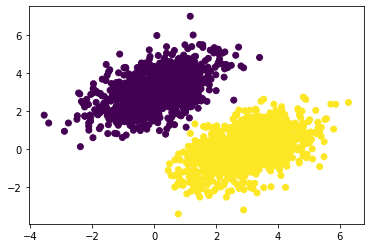

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:, 1], c=targets[:,0])
plt.show

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 6.6557
Loss at step 1: 1.0657
Loss at step 2: 0.2910
Loss at step 3: 0.1694
Loss at step 4: 0.1432
Loss at step 5: 0.1315
Loss at step 6: 0.1225
Loss at step 7: 0.1145
Loss at step 8: 0.1072
Loss at step 9: 0.1005
Loss at step 10: 0.0943
Loss at step 11: 0.0886
Loss at step 12: 0.0834
Loss at step 13: 0.0786
Loss at step 14: 0.0742
Loss at step 15: 0.0701
Loss at step 16: 0.0664
Loss at step 17: 0.0630
Loss at step 18: 0.0598
Loss at step 19: 0.0569
Loss at step 20: 0.0542
Loss at step 21: 0.0518
Loss at step 22: 0.0495
Loss at step 23: 0.0475
Loss at step 24: 0.0456
Loss at step 25: 0.0438
Loss at step 26: 0.0422
Loss at step 27: 0.0407
Loss at step 28: 0.0393
Loss at step 29: 0.0381
Loss at step 30: 0.0369
Loss at step 31: 0.0359
Loss at step 32: 0.0349
Loss at step 33: 0.0340
Loss at step 34: 0.0332
Loss at step 35: 0.0324
Loss at step 36: 0.0317
Loss at step 37: 0.0311
Loss at step 38: 0.0305
Loss at step 39: 0.0300


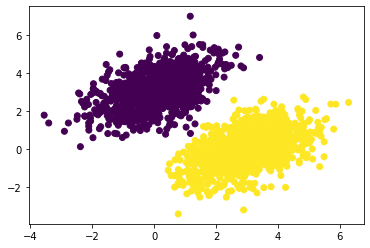

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

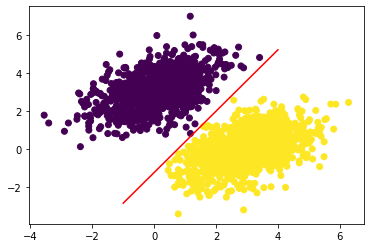

In [ ]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape= (self.units,), initializer="zeros")
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([layers.Dense(32, activation='relu'), layers.Dense(32)])